In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import matplotlib.colors as mcolors
from numpy.random import multivariate_normal
from scipy import stats
import pandas as pd
from astropy.cosmology import WMAP5 as cosmo

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


979 1058.1943016625873
(-0.5, 2959.5) (-0.5, 2959.5)


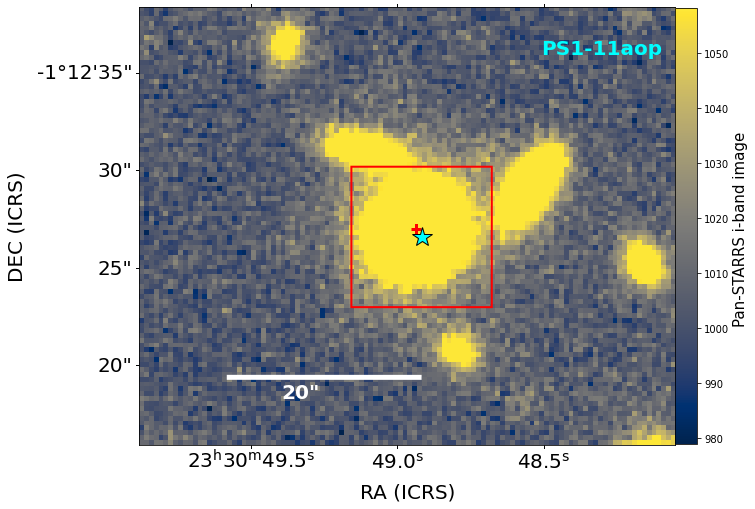

In [104]:
from astropy.visualization.wcsaxes import SphericalCircle
from astropy.wcs import WCS
from regions import EllipseSkyRegion
from matplotlib.patches import Ellipse
from astropy.io import fits
from matplotlib.patches import Rectangle
from astropy.visualization import ZScaleInterval
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle, SkyCoord

hdu = fits.open('/Users/adaezeibik/Thesis_related/PS11aop_work/optical_analysis/md10s034.i.templd.336279_101.sw.fits')
wcs = WCS(hdu[0].header,naxis=2)
image_data1 = hdu[0].data

interval = ZScaleInterval()
minpixelvalue1 = interval.get_limits(image_data1)[0]
maxpixelvalue1 = interval.get_limits(image_data1)[1]
print(minpixelvalue1,maxpixelvalue1)

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=wcs)
im=ax.imshow(image_data1,origin='lower',interpolation='nearest', cmap='cividis', vmin=minpixelvalue1, vmax=maxpixelvalue1) #-0.014425263 0.03562570716065311

cbar = plt.colorbar(im,ax=ax, pad=0, fraction=0.039)
cbar.set_label("Pan-STARRS i-band image ", size =15)
#cbar.minorticks_on()

#Galaxy 1
left2, bottom2, width2, height2 = (352.703821-0.001,-1.207386-0.001, 0.002, 0.002) 
rect2=Rectangle((left2,bottom2),width2,height2, 
                        fill=False,
                        color="red",
               transform=ax.get_transform('icrs'),
                       linewidth=2)
                       #facecolor="red")
ax.add_patch(rect2) 
#ax.text(352.703821, -1.207386,'1',fontsize = 15,transform=ax.get_transform('icrs'), color='red',fontweight ='bold')
plt.plot(352.7039, -1.2075,'+',ms=10,transform=ax.get_transform('icrs'), color='red',mew=3) #host
plt.plot(352.703821,-1.207386,'*',ms=20,transform=ax.get_transform('icrs'),color='cyan',lw=3,markeredgecolor='k') #SN

#352.7039 -1.2075 host RA and DEC from catalog
#352.7038	-01.2074 SN position from catalog
#overlay = ax.get_coords_overlay('icrs') 
#overlay.grid(color='white',lw= 3, ls='dotted')

plt.tick_params(labelsize=20)
plt.xlabel(r'RA (ICRS)', fontsize =20)
plt.ylabel(r'DEC (ICRS)',fontsize =20)
ylim = ax.get_ylim()
xlim = ax.get_xlim()
print(xlim,ylim)
ax.set_ylim(ylim[0]+450, ylim[1]-2600)
ax.set_xlim(xlim[0]+100, xlim[1]-2750)

plt.hlines(-1.205386,352.703821,352.703821+0.0027753931,color='white',transform=ax.get_transform('icrs'), lw=5)
ax.text(352.705821,-1.205086,'20"',fontsize = 20,transform=ax.get_transform('icrs'), color='white', fontweight ='bold')
ax.text(352.702121,-1.209986,'PS1-11aop',fontsize = 20,transform=ax.get_transform('icrs'), color='cyan', fontweight ='bold')


plt.savefig('PS11aop-image.png',bbox_inches='tight',dpi = 500, transparent = True)


In [25]:
CDELTA =  -6.938483E-05 #6.94444461259988E-05
pixel_value = 10/(CDELTA*3600) #10 arcsec/(CDELTA from header in deg * 3600) in arcsec, 0.00277778 deg
deg_value = 39.999999031424714*CDELTA
deg_value

-0.0027753931327955685

In [633]:
file='spectra.csv'
data = ascii.read(file,format='csv')
file1='grizps11aop.csv'
data1 = ascii.read(file1,format='csv')

#first epoch spectra of PS1-11aop
l = data['waves1']
flux = data['flux_corr1']
fluxerr = data['fluxerror']

#second epoch spectra of PS1-11aop
lg = data['waves2']
fluxg = data['flux_corr2']

#host galaxy spectra
lga = data['wavesg']
fluxga = data['flux_corrg']

#detections
tg = data1['phaseg']+0.525965
amg = data1['mag_absg']
amge = data1['dmag_absg']
ti = data1['phasei']+0.525965
ami = data1['mag_absi']
amie = data1['dmag_absi']
tr = data1['phaser']+0.525965
amr = data1['mag_absr']
amre = data1['dmag_absr']
tz = data1['phasez']+0.525965
amz = data1['mag_absz']
amze = data1['dmag_absz']

#upper limits
tuz = data1['time_lz']+0.525965
amuz = data1['mag_abslz']

tur = data1['time_lr']+0.525965
amur = data1['mag_abslr']

tui = data1['time_li']+0.525965
amui = data1['mag_absli']

tug = data1['time_lg']+0.525965
amug = data1['mag_abslg']



In [54]:
#discovery date from i-band
tg+0.525965, amg #+55770.562 # 55765.93094 i,

(<MaskedColumn name='phaseg' dtype='float64' length=58>
 -2.4630549999999998
                 0.0
  2.4630549999999998
   4.926105000000001
            7.389165
            9.852215
           19.704465
           24.547165
  27.093564999999998
           29.556665
           32.019665
  34.399364999999996
                 ...
                  --
                  --
                  --
                  --
                  --
                  --
                  --
                  --
                  --
                  --
                  --
                  --,
 <MaskedColumn name='mag_absg' dtype='float64' length=58>
 -20.043928
   -20.1371
 -20.065514
 -20.015186
 -20.038391
 -19.960644
 -19.858509
 -19.850014
  -19.80258
  -19.80876
 -19.746153
 -19.673008
        ...
         --
         --
         --
         --
         --
         --
         --
         --
         --
         --
         --
         --)

In [155]:
#galaxy stellar mass from photometry
Msun = 1.98e30 *1e3 #kg
Lsun = 3.84e33 #ergs/s
Mgal = (10**(0.4*(-26.93+17))*1)#/Lsun
np.log10(Mgal)

-3.972

## spectra analysis

In [40]:
#estimate error in redshift
redshift = np.array([0.217783,0.217799,0.217764,0.217792,0.217747,0.217822,0.217757,0.217858]) 
np.mean(redshift), np.std(redshift) #0.21779025 + 0.0000343


(0.21779025000000002, 3.427006711402422e-05)

In [49]:
dist = cosmo.luminosity_distance(0.21779025)
#dist


In [34]:
#subtracted spectrum results
ha_flux = 3.7780448697933156*1e-15
ha_fluxerr = 0.005664278756670813*1e-15
nii_flux = 1.2583252201654382*1e-15
nii_fluxerr =  0.005515749501558963*1e-15
hb_flux = 0.7099297138719285*1e-15
hb_fluxerr = 0.005675258295526887*1e-15
oiii_flux = 0.23344947436035976*1e-15
oiii_fluxerr = 0.003953491496325586*1e-15

print(ha_flux, hb_flux,nii_flux, oiii_flux)

3.778044869793316e-15 7.099297138719285e-16 1.2583252201654383e-15 2.334494743603598e-16


In [30]:
#Estimate error for the bpt ratios
x =nii_flux/ha_flux
x_err =np.sqrt((nii_fluxerr/nii_flux)**2+ (ha_fluxerr/ha_flux)**2)*(nii_flux/ha_flux)

y = oiii_flux/hb_flux 
y_err = np.sqrt((oiii_fluxerr/oiii_flux)**2+ (hb_fluxerr/hb_flux)**2)*(oiii_flux/hb_flux)

print(x,y)

0.3330625398936241 0.32883462939892405


In [31]:
#f = log10(x) and you have sigma(x)
#sigmaf = (sigmax/x)/ln(10)
error_x = (x_err/x)/np.log(10)
error_y = (y_err/y)/np.log(10)
print(error_x,error_y)

0.002011961644533891 0.008133068863581039


In [32]:
# Metallicity calculation

n2 = x
o2 = y
#o2=oiii2_m/hb2_m 
o2_err = y_err
n2_err = x_err

print(n2,n2_err, o2, o2_err)

0.3330625398936241 0.0015429831218677365 0.32883462939892405 0.006158113439321538


In [43]:
#oxygen abundance, log10(O/H)+12 = 8.9+0.57*n2
oxy_abund = 8.9 + (0.57*(n2))
meterr = np.sqrt((nii_fluxerr/nii_flux)**2 + (ha_fluxerr/ha_flux)**2)
oxy_abund, meterr  #9.09245156688052 +/- 0.0039344
#new one (9.089845647739367, 0.004632712890379523)

(9.089845647739367, 0.004632712890379523)

In [34]:
#using oxygen abundance to calculate metalicity
solar_oxy_abund = 8.66
10**(oxy_abund-12)/10**(solar_oxy_abund-12)


2.690578377628136

## Estimate Balmer decrement and H-alpha extinction <https://arxiv.org/pdf/1507.04092.pdf> 

In [35]:
#H-alpha and H-beta estimated from spectra in erg/cm2/s/Å unit
#oxygen = 9.09773664957192e-17 #0.1034e-15
#nitrogen = 4.632235010690665e-16 #0.467e-15
ha = ha_flux #1.3719680223403523e-15 #1.342e-15 
hb = hb_flux #2.0084018391492865e-16 #0.2612e-15
A_alphac = 6.53*np.log10(ha/hb)-2.98
A_alphac_err = (np.sqrt((ha_fluxerr/ha)**2 + (hb_fluxerr/hb)**2))/np.log(10)
A_alphac, A_alphac_err


(1.7611179777239774, 0.0035323289715236492)

In [38]:
#SFR with H_alpha for PS1-11aop (Hβ, [O III]λ5007, Hα and [N II]λ6585), 

ha = 3.778e-15 #1.342e-15 #ergs/s/A
#hb = 0.2612e-15
#A_alphac = 6.53*np.log10(ha/hb)-2.98
#F_corr = ha*np.exp(A_alphac/1.086)

z = 0.218
dl = 1070.1 #cosmo.luminosity_distance(z)
lum2 = 4*3.142*(dl*3.086e+24)**2*(ha)/(1+z) 
lum_err = lum2*np.sqrt((ha_fluxerr/ha_flux)**2 )   
sfra2 = 7.9e-42*lum2
sfr_err = sfra2*(lum_err/lum2)
sfra2, sfr_err, lum2,lum_err  #sfr = 1.51406705 +/- 0.01047 solar mass/year, 1.91654058 +/- 0.01 e+41
#1.5193067274183376-1.508827389145153,  1.92317307e+41-1.90990809e+41

#new result 

(3.3585243407986978,
 0.0050353076082944,
 4.251296633922402e+41,
 6.373807099106836e+38)

In [1]:
def radioluminosity(flux,ferr,z, ld=1070.1):
    #ld = 1070.1 #Mpc #cosmo.luminosity_distance(0.218)
    f_p = flux *1e-23
    lum = 4*3.142*(ld*3.08568*10**24)**2*f_p/(1+z)
    #error in luminosity
    lum_err = lum*np.sqrt((ferr/flux)**2 )        
    return lum, lum_err

In [2]:
def SFR_radio(flux, z):
    f_p = flux *1e-23 
    dl = 1070.1 #cosmo.luminosity_distance(z)
    lum_radio = 4*3.142*(dl*3.086e+24)**2*f_p/(1+z)
    sfr_radio = 6.35e-29*lum_radio  # From Murphy et al 2011,
    return sfr_radio
def SFR_halpha(ha_flux, z):
    dl = 1070.1 #cosmo.luminosity_distance(z)
    lum_ha = 4*3.142*(dl*3.086e+24)**2*ha_flux/(1+z)
    #sfr_ha = 5.37e-42*lum_ha #measure of the current star-formation activity <10 Myr, Murphy et al 2011
    sfr_ha = 7.9e-42*lum_ha #measure of the current star-formation activity <10 Myr, kennicut 1998
    return sfr_ha

def SFR_thermal_radio(flux, z,freq9):
    f_p = flux *1e-23 
    dl = 1070.1 #cosmo.luminosity_distance(z)
    lum_radio = 4*3.142*(dl*3.086e+24)**2*f_p/(1+z)
    sfr_tradio = 4.6e-28*1**(0.45)*freq9**(0.1)*lum_radio  # thermal radio
    return sfr_tradio
def SFR_nonthermal_radio(flux, z, freq9, alpha):
    f_p = flux *1e-23 
    dl = 1070.1 #cosmo.luminosity_distance(z)
    lum_radio = 4*3.142*(dl*3.086e+24)**2*f_p/(1+z)
    sfr_ntradio = 6.64e-29*(freq9)**alpha*lum_radio  # non-thermal radio
    return sfr_ntradio
def flux_rad_sfra(sfr_halpha,z, freq9,alpha):
    dl = 1070.1 #cosmo.luminosity_distance(z)
    lum_radio_inferred = sfr_halpha/(6.64e-29*(freq9)**alpha)*freq9**(0.1) #non-thermal
    fpi = (lum_radio_inferred*(1+z))/(4*3.142*(dl*3.086e+24)**2)
    flux_inferred = fpi/1e-23 
    return flux_inferred*1e6
def SHalpha_Sradio(ha_flux, freq9):
    flux_rad = (1.14e-14*1**(0.34)*freq**(-0.1)*ha_flux)/1e-23
    return flux_rad*1e6

In [116]:
def tflux_rad_sfra(sfr_halpha,z, freq9,alpha):
    dl = 1070.1 #cosmo.luminosity_distance(z)
    lum_radio_inferred = sfr_halpha/(4.6e-28*1**(0.45))*freq9**(0.1) #thermal
    fpi = (lum_radio_inferred*(1+z))/(4*3.142*(dl*3.086e+24)**2)
    flux_inferred = fpi/1e-23 
    return flux_inferred*1e6

In [117]:
#The one to use for radio
def SFR_MRC(flux,z,freq9,alpha):
    f_p = flux *1e-23 
    dl = 1070.1  #cosmo.luminosity_distance(z)
    lum_radio = 4*3.142*(dl*3.086e+24)**2*f_p/(1+z)
    sfr_tradio = 4.6e-28*1**(0.45)*freq9**(0.1)*lum_radio  # thermal radio
    sfr_ntradio = 6.64e-29*(freq9)**alpha*lum_radio # non-thermal radio
    sfr_mrc = sfr_tradio + sfr_ntradio  #combined
    return sfr_mrc

def mrc_fluxrad(sfr_halpha,z, freq9,alpha):
    lum_radt_inferred = sfr_halpha/(4.6e-28*1**(0.45))*freq9**(0.1) #thermal
    fpit = (lum_radt_inferred*(1+z))/(4*3.142*(dl*3.086e+24)**2)
    fluxt_inferred = fpit/1e-23  

    lum_radnt_inferred = sfr_halpha/(6.64e-29*(freq9)**alpha)*freq9**(0.1) #non-thermal
    fpint = (lum_radnt_inferred*(1+z))/(4*3.142*(dl*3.086e+24)**2)
    fluxnt_inferred = fpint/1e-23
    flux_inferred = fluxt_inferred + fluxnt_inferred
    return flux_inferred*1e6 #in uJy
   

In [21]:
#Updated functions from PS1-11aop paper. USED

def SFR_MRC(flux,z,freq9,alpha=0.8):
    #Sth = (38/100)*flux #for 9 GHz
    #Snt = (62/100)*flux #for 9 GHz
    Sth = (27/100)*flux #for 6 GHz
    Snt = (73/100)*flux #for 6 GHz
    f_pth = Sth *1e-23 
    f_pnt = Snt *1e-23 
    dl = cosmo.luminosity_distance(z)
    lum_radio_th = 4*3.142*(dl.value*3.086e+24)**2*f_pth/(1+z)
    lum_radio_nt = 4*3.142*(dl.value*3.086e+24)**2*f_pnt/(1+z)
    sfr_tradio = 4.6e-28*1**(-0.45)*freq9**(0.1)*lum_radio_th  # thermal radio
    sfr_ntradio = 6.64e-29*(freq9)**alpha*lum_radio_nt # non-thermal radio
    
    sfr_mrc = sfr_tradio + sfr_ntradio  #combined
    return sfr_mrc

def mrc_fluxrad(sfr_halpha,z, freq9,alpha=0.8):
    dl = cosmo.luminosity_distance(z)
    lum_radt_inferred = sfr_halpha/(4.6e-28*1**(-0.45))*freq9**(0.1) #thermal
    fpit = (lum_radt_inferred*(1+z))/(4*3.142*(dl.value*3.086e+24)**2)
    fluxt_inferred = fpit/1e-23  

    lum_radnt_inferred = sfr_halpha/(6.64e-29*(freq9)**alpha)*freq9**(0.1) #non-thermal
    fpint = (lum_radnt_inferred*(1+z))/(4*3.142*(dl.value*3.086e+24)**2)
    fluxnt_inferred = fpint/1e-23
    
    flux_inferred = fluxt_inferred + fluxnt_inferred
    return flux_inferred
   

In [4]:
ha_flux = 1.342e-15 #1.37e-15
z = 0.218
SFR_halpha(ha_flux, z), 7.9e-42*1.5e41

(1.1929962057575045, 1.1849999999999998)

In [22]:
#using the 3rd epoch at 6GHz (USED Sth = 27% of total flux for C-band, ie 4-8 Ghz)

import numpy as np

freq9 = 6
alpha = 0.8
flux = 0.0317*1e-3#0.0063*1e-3
z = 0.218
sfr_halpha = 3.358 #1.193 #0.002
SFR_MRC(flux,z, freq9,alpha), mrc_fluxrad(sfr_halpha,z, freq9,alpha), flux/mrc_fluxrad(sfr_halpha,z, freq9,alpha) #SFR_nonthermal_radio(flux, z, 6, 0.8), SFR_thermal_radio(flux, z,6)
#mrc_fluxrad(sfr_halpha,z, freq9,alpha), flux_rad_sfra(sfr_halpha,z, 6,0.8), tflux_rad_sfra(sfr_halpha,z, 6,0.8)
#(29.56004497079835, 9.931338787004739, 19.62870618379361)
#(7.3122052573984995, 4.555195635907103, 2.7570096214913966)

#(12.790812675355927, 6.374401255544606e-06), 6.37uJy

(12.790812675355927, 2.0193952725656493e-05, 1.5697768748227794)

In [23]:
#using the 2nd epoch detection at 6GHz (USED Sth = 27% of total flux for C-band, ie 4-8 Ghz)
import numpy as np
freq9 = 6
alpha = 0.8
flux = 3.18E-05 #9.5e-6
z = 0.218
sfr_halpha = 3.358 #1.193 #0.002
SFR_MRC(flux,z,freq9,alpha), mrc_fluxrad(sfr_halpha,z, freq9,alpha), flux/mrc_fluxrad(sfr_halpha,z, freq9,alpha) # SFR_nonthermal_radio(flux, z, 6, 0.8), SFR_thermal_radio(flux, z,6)
#mrc_fluxrad(sfr_halpha,z, freq9,alpha), flux_rad_sfra(sfr_halpha,z, 6,0.8),tflux_rad_sfra(sfr_halpha,z, 6,0.8)
#(29.653294324018542, 9.962667931443242, 19.6906263925753
#(7.3122052573984995, 4.555195635907103, 2.7570096214913966)

(12.831162242155157, 2.0193952725656493e-05, 1.5747288523458798)

In [20]:
#using the 1st epoch 9.7GHz  (Used Sth = 38% of total flux for X-band, ie 8-12 Ghz)
import numpy as np
freq9 = 9.77
alpha = 0.8
flux = 0.0405*1e-3 #7.8e-6
z = 0.218
sfr_halpha = 3.358 #1.193 #0.002
SFR_MRC(flux,z, freq9,alpha), mrc_fluxrad(sfr_halpha,z, freq9,alpha), flux/mrc_fluxrad(sfr_halpha,z, freq9,alpha)#, SFR_nonthermal_radio(flux, z, 9.77, 0.8), SFR_thermal_radio(flux, z,9.77)
#mrc_fluxrad(sfr_halpha,z, freq9,alpha),# flux_rad_sfra(sfr_halpha,z, 9.77,0.8),tflux_rad_sfra(sfr_halpha,z, 9.77,0.8)
#(45.07189640220378, 18.74123510615875, 26.330661296045022)
#(6.1328339235334655, 3.2380735891159613, 2.8947603344175037)
#

(22.040820716474055, 1.693690945024136e-05, 2.39122728494146)

In [129]:
#infered radio flux from 3rd epoch 6GHz = 5.16237*1e-6 Jansky using the MRC
S1=0.0317*1e-3 #from observe
S1_err = 0.0063*1e-3 

S2= 7.3122052573984995*1e-6# #from SFR_optical_mrc
S2_err = 0.0017*1e6
S1/S2, #MRC 4.335

(4.335217473268532,)

In [130]:
#infered radio flux from 1st epoch 9.7 GHz = 10.3572*1e-6 Jansky using the MRC
S1=0.0405*1e-3 #from observe
S1_err = 7.8e-6 

S2= 6.13283*1e-6 #from SFR_optical
S2_err = 0
S1/S2 #MRC 6.60380

6.6038028120786

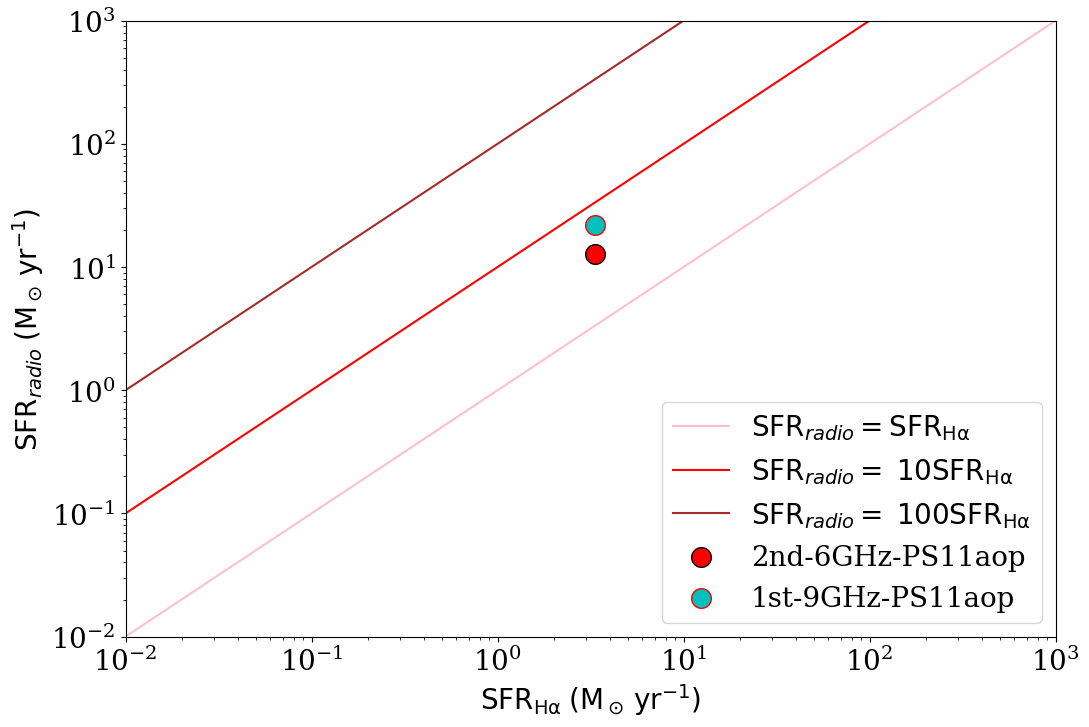

In [60]:
#PS1-11aop
#sfr_optical = np.array([0.033,1.0394, 0.43168, 0.31622,6.9183,9.772])
#sfr_radio = np.array([0.0369,3.3151,1.14269,0.89719, 13.2069,8.291])
x_line = np.logspace(-2,6)
y_line=[x for x in x_line]
y_line_10=[x*10 for x in x_line]
y_line_100=[x*100 for x in x_line]

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 20})
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

plt.figure(figsize=(12,8))
plt.ylabel(r'${\rm SFR}_{radio}\;({\rm M}_\odot\,{\rm yr}^{-1})$', fontsize =20)
plt.xlabel(r'${\rm SFR_{H\alpha}}\;({\rm M}_\odot\,{\rm yr}^{-1})$',fontsize =20)
#these are those diagonal lines of 1:1 , 1:10, and 1:100 ratios
plt.plot(x_line,y_line,c='pink',label=r'${\rm SFR}_{radio}={\rm SFR_{H\alpha}}$')
plt.plot(x_line,y_line_10,c='red',label=r'${\rm SFR}_{radio}={\rm\;10}{\rm SFR_{H\alpha}}$')
plt.plot(x_line,y_line_100,c='brown',label=r'${\rm SFR}_{radio}={\rm\;100}{\rm SFR_{H\alpha}}$')
#these are the limits that were relevant for my sample
plt.xlim(1e-2,10**(3))
plt.ylim(1e-2,10**(3))
#at 6GHz
#plt.scatter(1.193,12.79,s=200,ec='k',c='orange',label='3rd-6GHz-PS11aop')
#plt.scatter(1.193,9.9313, s=200,ec='k',c='m',label='non-thermal') 
plt.scatter(3.358,12.83, s=200,ec='k',c='r',label='2nd-6GHz-PS11aop')
#At 9.7GHz
#plt.scatter(1.193,26.330661,s=200,ec='r',c='orange')#,label='thermal')
#plt.scatter(1.193,18.741, s=200,ec='r',c='m')#,label='non-thermal') 
plt.scatter(3.358,22, s=200,ec='r',c='c',label='1st-9GHz-PS11aop')

#plt.errorbar(sfr_optical,sfr_radio,xerr = sfr_u_err_plot,yerr = sfr_radio_err_plot,c='C1', fmt='none')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=4,fontsize =20)
#plt.title ("Star Formation Rate")
#this will add the label to the diagonal lines
#labelLines(plt.gca().get_lines(),xvals=[1.3,1.3,1.3],va="bottom", ha="left")
#plt.savefig("SFR_comparPS11aop.jpeg",dpi=300,bbox_inches='tight')

In [25]:
z = 0.218
flux = 0.0405*1e-3 #Jy at 9GHz, first epoch of PS1-11aop
freq9 = 9.77
alpha = -0.8
ha_flux = 1.342e-15
sfr_halpha  = 1.193 #1.193(2)
sfr_halpha, SFR_thermal_radio(flux, z, freq9), SFR_nonthermal_radio(flux, z,freq9, alpha),flux_rad_sfra(sfr_halpha,z, freq9)


(1.19, 32.687096226138834, 0.6065707750072623, 1.4744350390310899)

In [52]:
#For PS1-11aop
SFR_halpha(1.342e-15, 0.218)

(1.0067017690819449, <Quantity 1.87467741e+41 Mpc2>)

In [59]:
z = 0.218
flux = 0.0405*1e-3 #Jy at 9GHz, first epoch of PS1-11aop
freq9 = 9.77
alpha = -0.8
SFR_thermal_radio(flux, z, freq9)

32.687096226138834

In [60]:
z = 0.218
flux = 0.0405*1e-3 #Jy at 9GHz, first epoch of PS1-11aop
freq9 = 9.77
alpha = -0.8
SFR_nonthermal_radio(flux, z,freq9, alpha)

0.6065707750072623

In [84]:
sfr_halpha  = 1.5
z = 0.218
freq9 = 9.77
flux_in = flux_rad_sfra(sfr_halpha,z, freq9) #in uJy, a lower estimated flux compared to observed flux indicates a non-thermal source responsible for the radio emission.
flux_in, 0.03*1e-3*1e6


(1.8585315618038947, 30.0)

In [82]:
ha_flux = 1.342e-15
freq9 = 9.77
SHalpha_Sradio(ha_flux, freq9)

0.15334439655193743

In [201]:
#PS1-11aop bright host galaxy effective radius
R_50 = 2.3291506 #arcsec
ld = cosmo.luminosity_distance(0.218)
size_50 = (R_50/206265)*dl*1e6
size_50

size_80 = 5.119 #in kpc
R_80 = (size_80/dl*1e3) #in kpc
R_80.value

4.738349839215688

In [176]:
#SFR using radio fluxes

alpha = 0.8 #
freq = 8
ld = ld = cosmo.luminosity_distance(0.218) #Mpc
flux = 0.0405*1e3 #Jy at 1.5GHz at 5sigma
f_p = flux *1e-23 
lum = 4*3.142*(ld*3.08568*10**24)**2*f_p
#MRC = ((lum*freq*1e9**(-alpha))/(alpha+1))*((10.5e9**(alpha+1))-(1.4e9**(alpha+1)))
MRC = ((lum*freq*1e9**(-alpha))/(alpha+1))*((9e9**(alpha+1))-(7e9**(alpha+1)))
sfr = 3.5e-31*MRC**(0.8)
lum,sfr.value # 

(<Quantity 5.65638525e+34 Mpc2>, 85650.31668568084)

In [172]:
#SPECTRA INDEX for PS1-11aop epochs #epoch 3 0.0317 +/- 0.0063 at 6GHz
s = 0.0405*1e3  #Jy epoch 1
so = 0.0317*1e3 #0.0318*1e3  #Jy epoch 2
v =8e9 #epoch 1 Hz
vo = 6e9 #epoch 2 Hz
a = np.log(s/so)/np.log(v/vo)
a

es = 0.0078*1e3 #Jy epoch 1 err
eso = 0.0063*1e3 #0.0095*1e3 #Jy epoch 2 err
ea = a*np.sqrt((es/s)**2 + (eso/so)**2)
print(a,ea) # 

0.8515834551015381 0.23567295884399905


## Spectra dates and time

first epoch = 27th October, 2011 = MJD 55861, number of days with respect to g-max = 90.43800 days
second epoch = 20th July, 2012 = MJD 56128, number of days with respect to g-max = 357.4380 days
host galaxy spectra = 23rd September 2014 = 56923, number of days with respect to g-max = 1152.438 days
g-max = 55770.562

In [72]:
g_max = 55770.562
56923-g_max

1152.438000000002

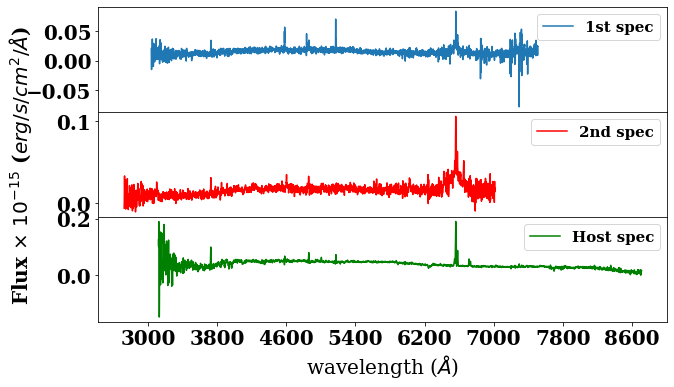

In [135]:
#plt.plot(lg,fluxg,'.')
fig, axs = plt.subplots(3, sharex=True, gridspec_kw={'hspace': 0},figsize=(10.20,5.80))
axs[0].plot(l,flux*1e15, label = '1st spec')
axs[0].legend(fontsize =15)
axs[1].plot(lg,fluxg,color = 'red', label = '2nd spec')
axs[1].legend(fontsize =15)
axs[2].plot(lga,fluxga,color = 'green', label = 'Host spec')
#plt.yscale('log')
#plt.xscale('log')
#plt.ylabel(r'Flux $\times$ $10^{-15}$ ($erg/s/cm^{2}/\AA$)',fontsize=20)
fig.text(0.001, 0.5, r'Flux $\times$ $10^{-15}$ ($erg/s/cm^{2}/\AA$)',fontsize=20, va='center', rotation='vertical')
#axs[1].set_ylabel(r'Flux $\times$ $10^{-15}$ ($erg/s/cm^{2}/\AA$)',fontsize=20)
plt.xlabel(r'wavelength ($\AA$)',fontsize=20)
start, end = axs[1].get_xlim()
axs[0].xaxis.set_ticks(np.arange(3000, 7800, 800))
#plt[0].xlim(6200,7000) #(np.arange(6200, 7000, 10))
#plt.rcParams['axes.grid'] = True
#plt.ylabel('Flux')
plt.legend(fontsize =15)
plt.rc('grid', linestyle="-", color='#cccccc',alpha = 0.5)
axs[1].tick_params(labelsize=20)
axs[0].tick_params(labelsize=20)
axs[2].tick_params(labelsize=20)
axs[1].xaxis.set_ticks(np.arange(3000, 7800, 800))
axs[2].xaxis.set_ticks(np.arange(3000, 9000, 800))
#plt.xlim(6500,6700) #(np.arange(6200, 7000, 10))
#plt.grid(True)
plt.show()
#plt.savefig('spectrum.pdf')

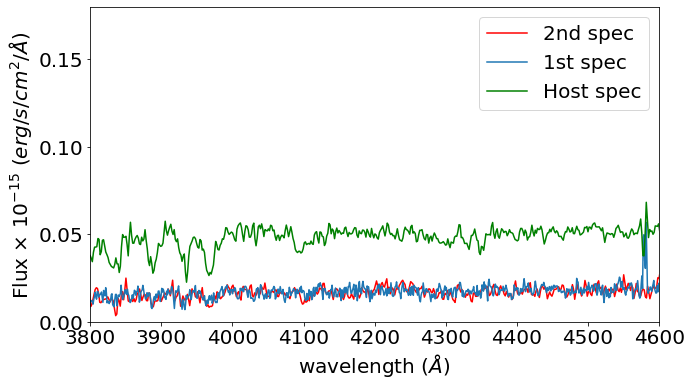

In [12]:
fig = plt.figure(figsize=(10.20,5.80))
plt.plot(lg,fluxg,color = 'red', label = '2nd spec')
plt.plot(l,flux*1e15, label = '1st spec')
plt.plot(lga,fluxga,color = 'green', label = 'Host spec')
#plt.yscale('log')
#plt.xscale('log')
plt.ylabel(r'Flux $\times$ $10^{-15}$ ($erg/s/cm^{2}/\AA$)',fontsize=20)
plt.xlabel(r'wavelength ($\AA$)',fontsize=20)

plt.rcParams['axes.grid'] = True
#plt.ylabel('Flux')
plt.legend(fontsize =20)
#plt.rc('grid', linestyle="-", color='#cccccc',alpha = 0.5)
plt.tick_params(labelsize=20)
plt.xlim(3800,4600)
plt.ylim(0,0.18)
#plt.xaxis.set_ticks(np.arange(3000, 9500, 800))
#plt.grid(True)
plt.show()
#plt.savefig('spectrum.pdf')

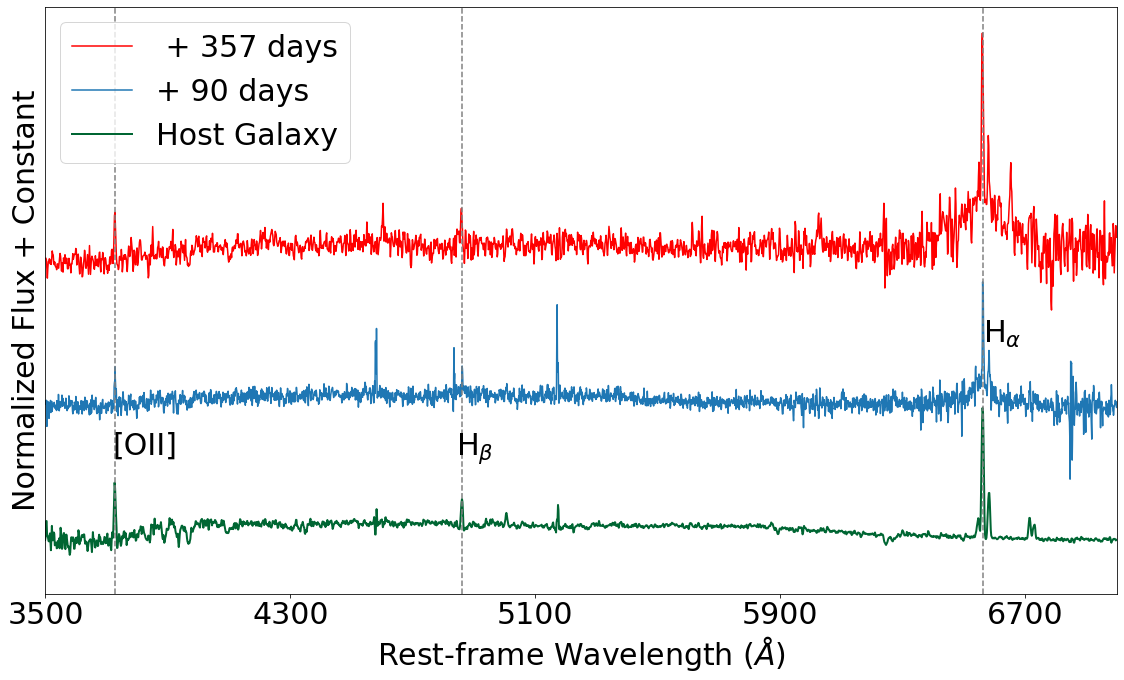

In [57]:
def norm(data):
    return (data)/(max(data)-min(data))

fig,ax = plt.subplots(figsize=(19.20,10.80))
#fig, ax = plt.subplots()
offset1 = 0.5
offset2 = 1
ax.plot(lg,norm(fluxg)+offset2,color = 'red', label = ' + 357 days')
ax.plot(l,norm(flux*1e15)+offset1, label = '+ 90 days')
ax.plot(lga,norm(fluxga),color = '#006633',linewidth = 2, label = 'Host Galaxy')
ax.tick_params(labelsize=30)

plt.ylabel(r'Normalized Flux + Constant',fontsize=30)
plt.xlabel(r'Rest-frame Wavelength ($\AA$)',fontsize=30)
ax.xaxis.set_ticks(np.arange(3500, 7000, 800))
plt.rcParams['axes.grid'] = False
plt.legend(loc ='upper left', fontsize =30)
ax.set_xlim(3500,7000)
ax.set_ylim(-0.1,2)
ax.axvline(x=6562.852, linestyle = '--', ymin=0, ymax=1, color = 'gray')
ax.text(6562,0.8, r'H$_\alpha$', fontsize=30)
ax.axvline(x=4861.33, linestyle = '--', ymin=0, ymax=1, color = 'gray')
ax.text(4840,0.4, r'H$_\beta$', fontsize=30)
ax.axvline(x=3727, linestyle = '--',ymin=0, ymax=1, color = 'gray')
ax.text(3720,0.4, r'[OII]', fontsize=30)
ax.axes.get_yaxis().set_ticks([])
#plt.ylabel(r'Normalized Flux',fontsize=15)

#plt.show()
#plt.savefig('spectrum.pdf')
plt.savefig('spectrum.png', dpi = 300, transparent = True)

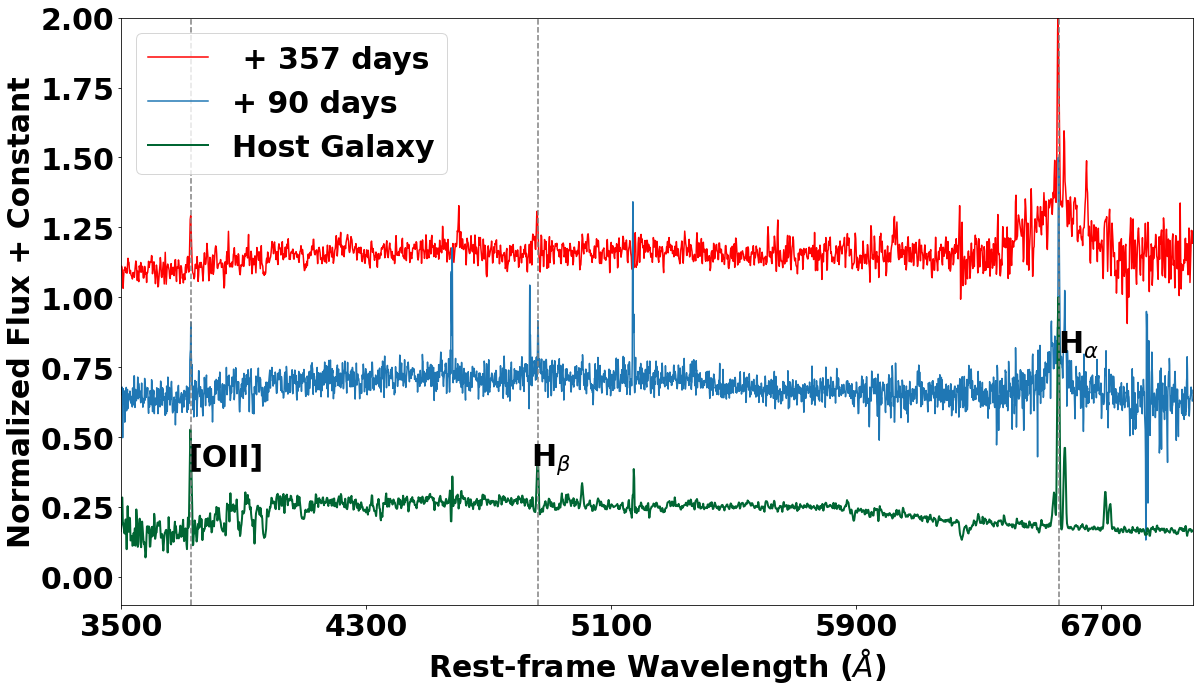

<Figure size 432x288 with 0 Axes>

In [72]:
def norm(data):
    return (data)/max(data)
from matplotlib import rc,rcParams
rc('font', weight='bold')
fig,ax = plt.subplots(figsize=(19.20,10.80))
#fig, ax = plt.subplots()
offset1 = 0.5
offset2 = 1
ax.plot(lg,norm(fluxg)+offset2,color = 'red', label = ' + 357 days')
ax.plot(l,norm(flux*1e15)+offset1, label = '+ 90 days')
ax.plot(lga,norm(fluxga),color = '#006633',linewidth = 2, label = 'Host Galaxy')
ax.tick_params(labelsize=30)

plt.ylabel(r'Normalized Flux + Constant',fontsize=30,fontweight='bold')
plt.xlabel(r'Rest-frame Wavelength ($\AA$)',fontsize=30,fontweight='bold')
ax.xaxis.set_ticks(np.arange(3500, 7000, 800))
plt.rcParams['axes.grid'] = False
plt.legend(loc ='upper left', fontsize =30)
ax.set_xlim(3500,7000)
ax.set_ylim(-0.1,2)

ax.axvline(x=6562.852, linestyle = '--', ymin=0, ymax=1, color = 'gray')
ax.text(6562,0.8, r'H$_\alpha$', fontsize=30)
ax.axvline(x=4861.33, linestyle = '--', ymin=0, ymax=1, color = 'gray')
ax.text(4840,0.4, r'H$_\beta$', fontsize=30)
ax.axvline(x=3727, linestyle = '--',ymin=0, ymax=1, color = 'gray')
ax.text(3720,0.4, r'[OII]', fontsize=30)
#ax.axes.get_yaxis().set_ticks([])
#plt.ylabel(r'Normalized Flux',fontsize=15)

plt.show()
#plt.savefig('spectrum.png')
plt.savefig('spectrum.png', dpi = 300, transparent = True)

In [59]:
0.0001001310510083022-9.323463863328872e-05
#0.0001001310510083022-0.00016433774115068707
(6.420669014238487e-05+6.896412375013487e-06)/2
(0.0001001310510083022+9.323463863328872e-05+0.00016433774115068707)/3

0.00011923447693075933

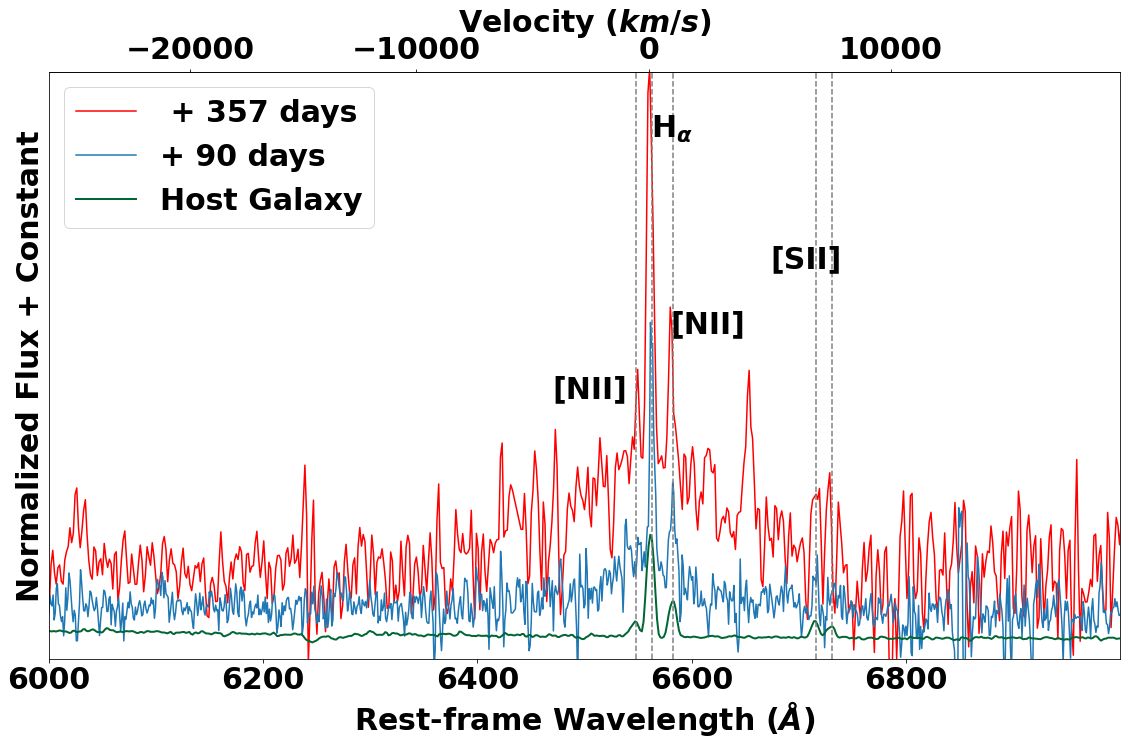

In [489]:
def norm(data):
    return (data)/(max(data)-min(data))
from matplotlib import rc,rcParams
rc('font', weight='bold')
fig,ax = plt.subplots(figsize=(19.20,10.80))
#fig, ax = plt.subplots()
ax.plot(lg,norm(fluxg),color = 'red', label = ' + 357 days')
ax.plot(l,norm(flux*1e15), label = '+ 90 days')
ax.plot(lga,fluxga,color = '#006633',linewidth = 2, label = 'Host Galaxy')
ax.tick_params(labelsize=30)
plt.ylabel(r'Normalized Flux + Constant',fontsize=30,fontweight='bold')
plt.xlabel(r'Rest-frame Wavelength ($\AA$)',fontsize=30,fontweight='bold')
ax.xaxis.set_ticks(np.arange(3500, 7000, 800))
plt.rcParams['axes.grid'] = False
plt.legend(loc ='upper left', fontsize =30)
ax.set_xlim(3500,7000)
ax.axvline(x=6562.852, linestyle = '--', ymin=0, ymax=1, color = 'gray')
ax.text(6562,0.8, r'H$_\alpha$', fontsize=30)
#zoom in
ax.axvline(x=6548,linestyle = '--', ymin=0, ymax=1, color = 'gray')
ax.text(6470,0.4, r'[NII]', fontsize=30)
ax.axvline(x=6583,linestyle = '--', ymin=0, ymax=1, color = 'gray')
ax.text(6580,0.5, r'[NII]', fontsize=30)
ax.axvline(x=6716,linestyle = '--', ymin=0, ymax=1, color = 'gray')
ax.text(6674,0.6, r'[SII]', fontsize=30)
ax.axvline(x=6731,linestyle = '--', ymin=0, ymax=1, color = 'gray')

#ax2 = ax.twiny()
#ax2.spines["top"].set_position(("axes", 1))
#ax2.set_xlabel(r'Velocity ($km/s$)',fontsize=30,fontweight ='bold') 

ax2.tick_params(labelsize=30)
ax.set_ylim(0,0.9)
ax.xaxis.set_ticks(np.arange(6000,7000,200))
ax.set_xlim(6000,7000)
#ax2.xaxis.set_ticks(np.arange(-5000,5000,1000))
ax.axes.get_yaxis().set_ticks([])

c = 3e11 #cm/s
z=0.218
def wave2vel(x):
    c = 3e10 #cm/s
    wave0= 6384 #6564.91 #6384 in Amstrong
    #return ((c*((wave0*1e-8)-(x*1e-8)))/(x*1e-8)) #/1e5  #x= wave
    return ((c*(wave0-x))/x)/1e5  #x= wave


def vel2wave(x):
    c = 3e10 #cm/s
    wave0= 6384 #6564.91 
    return (wave0)/np.sqrt((c-(x*1e5))/(c+(x*1e5))) #x=vel


#secax = subplots.secondary_xaxis('top', functions=(rad2time, time2rad))
secax = ax.secondary_xaxis('top', functions=(wave2vel, vel2wave))
secax.set_xlabel(r'Velocity ($km/s$)', fontsize =30,fontweight ='bold')
secax.tick_params(labelsize=30)

#plt.show()
#plt.savefig('spectrum-zoom.pdf')
plt.savefig('spectrum-zoom.png', dpi = 300, transparent = True)

NameError: name 'tg' is not defined

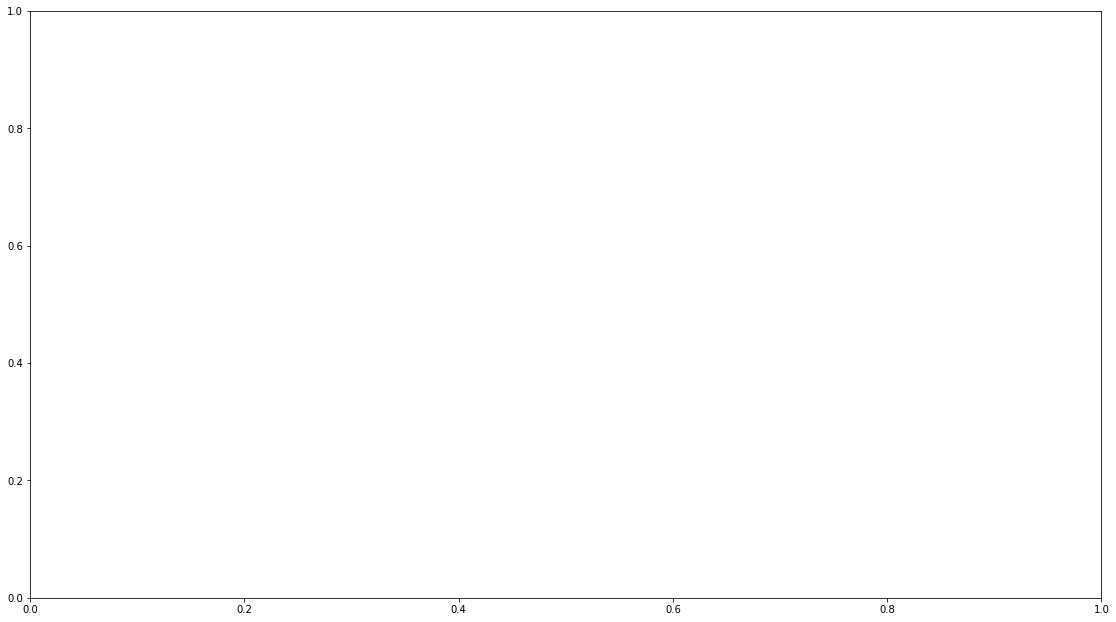

In [4]:

fig,ax = plt.subplots(figsize=(19.20,10.80))
file1='bol1.csv'
data1 = ascii.read(file1,format='csv')
t = data1['t0']
magabs = data1['mag_abs']
magerror =  data1['dmag']
yerr =  magerror
#plt.errorbar(t,magabs,yerr=magerror,fmt = 'k',marker= '+',markersize =10, label = 'Bol LC',linewidth = 5)
#plt.plot(t,magabs,color = 'k',linewidth = 5)

plt.errorbar(tg[:42],amg[:42]+0.5,yerr=amge[:42],marker= 'o',color ='orange',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'g+0.5',linewidth = 5)
plt.errorbar(ti[:42],ami[:42],yerr=amie[:42], marker ='o', color = 'c',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'i',linewidth = 5)
plt.errorbar(tr[:42],amr[:42],yerr=amre[:42],marker ='o', color = 'b',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'r',linewidth = 5)
plt.errorbar(tz[:46],amz[:46]-1.5,yerr=amze[:46],marker ='o', color = '#CDCD00',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'z-1.5',linewidth = 5)

#upper limit
plt.plot(tug,amug+0.5,marker= 'v',color ='orange',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)
plt.plot(tui,amui,marker= 'v',color ='c',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)
plt.plot(tur,amur,marker= 'v',color ='b',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)
plt.plot(tuz,amuz-1.5,marker= 'v',color ='#CDCD00',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)

#plt.plot(0,-19, 'gd',markersize =20, label = 'g-max' )
#plt.plot(90.4400000000023,-19, 'md',markersize =20, label = '1st S-90d' )
#plt.plot(357.440000000002,-20,'rd',markersize =20, label = '2nd S-357d' )
#plt.axvline(x=0, ymin= -20.5, ymax= -17.0,color = 'gray',linestyle = '--')
plt.plot([0,0],[-15,-22.5],color = 'gray',linestyle = '--',label = 'g-max')
plt.plot([90.4400000000023,90.4400000000023],[-15,-22.5],color = 'm',linestyle = '--',label = '1st S-90d')
plt.plot([357.440000000002,357.440000000002],[-15,-22.5],color = 'g',linestyle = '--',label = '2nd S-357d')

#plt.yscale('log')
#plt.xscale('log')
plt.ylim(-15.5,-22.5)
plt.xlabel('Rest-frame Days from g-max',fontsize =30)
plt.ylabel(r'Absolute Magnitude',fontsize=30)
plt.tick_params(labelsize=30)
plt.legend(fontsize =20)

#plt.show()
#plt.savefig('spec.pdf')
plt.savefig('LCspec.png', dpi = 300, transparent = True)

In [62]:
#decline rate
from scipy.stats import linregress

x=ti[:23]  #[:23],[:42]
y=ami[:23]

slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(slope,p_value, std_err)
#[:42] = 0.004130125949726614 4.7165449957670526e-32 0.00011502597863743345
#[:23] = 0.0035607946924033564 9.16285822481928e-16 0.00016596125642683978
#[24:42] = 0.008143792386144459 1.6178980969705985e-08 0.0007841223370051924

0.0035607946924033564 9.16285822481928e-16 0.00016596125642683978


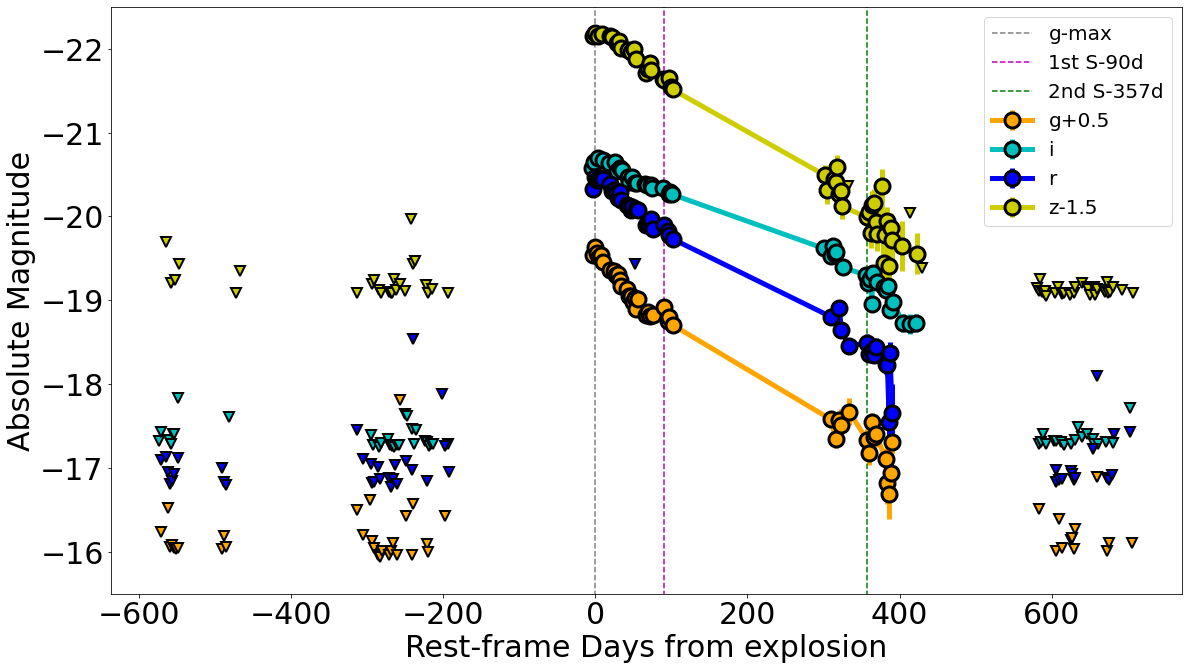

In [56]:
from scipy.optimize import curve_fit
fig,ax = plt.subplots(figsize=(19.20,10.80))
file1='bol1.csv'
data1 = ascii.read(file1,format='csv')
t = data1['t0']
magabs = data1['mag_abs']
magerror =  data1['dmag']
yerr =  magerror
#plt.errorbar(t,magabs,yerr=magerror,fmt = 'k',marker= '+',markersize =10, label = 'Bol LC',linewidth = 5)
#plt.plot(t,magabs,color = 'k',linewidth = 5)

plt.errorbar(tg[:42],amg[:42]+0.5,yerr=amge[:42],marker= 'o',color ='orange',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'g+0.5',linewidth = 5)
plt.errorbar(ti[:42],ami[:42],yerr=amie[:42], marker ='o', color = 'c',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'i',linewidth = 5)
plt.errorbar(tr[:42],amr[:42],yerr=amre[:42],marker ='o', color = 'b',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'r',linewidth = 5)
plt.errorbar(tz[:46],amz[:46]-1.5,yerr=amze[:46],marker ='o', color = '#CDCD00',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'z-1.5',linewidth = 5)

#upper limit
plt.plot(tug,amug+0.5,marker= 'v',color ='orange',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)
plt.plot(tui,amui,marker= 'v',color ='c',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)
plt.plot(tur,amur,marker= 'v',color ='b',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)
plt.plot(tuz,amuz-1.5,marker= 'v',color ='#CDCD00',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)

#power law
df= pd.read_csv("grizps11aop.csv") #read in the data
df = df.dropna() #drop the nan entries
index_fit=3 
data_t = df['phasei'].tolist()[:index_fit]
data_lum = 10**(-0.4*df['mag_absi'])
data_f = data_lum.tolist()[:index_fit]


#plt.plot(0,-19, 'gd',markersize =20, label = 'g-max' )
#plt.plot(90.4400000000023,-19, 'md',markersize =20, label = '1st S-90d' )
#plt.plot(357.440000000002,-20,'rd',markersize =20, label = '2nd S-357d' )
#plt.axvline(x=0, ymin= -20.5, ymax= -17.0,color = 'gray',linestyle = '--')
plt.plot([0,0],[-15,-22.5],color = 'gray',linestyle = '--',label = 'g-max')
plt.plot([90.4400000000023,90.4400000000023],[-15,-22.5],color = 'm',linestyle = '--',label = '1st S-90d')
plt.plot([357.440000000002,357.440000000002],[-15,-22.5],color = 'g',linestyle = '--',label = '2nd S-357d')

#plt.yscale('log')
#plt.xscale('log')
plt.ylim(-15.5,-22.5)
plt.xlabel('Rest-frame Days from explosion',fontsize =30)
plt.ylabel(r'Absolute Magnitude',fontsize=30)
plt.tick_params(labelsize=30)
plt.legend(fontsize =20)

#plt.show()
#plt.savefig('spec.pdf')
#plt.savefig('LCspec2.png', dpi = 300, transparent = True)

<ipython-input-9-66e596e67b66>:58: RuntimeWarning: invalid value encountered in power
  return F0*(t-t0)**alpha
/Users/adaezeibik/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/adaezeibik/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.03, 'Rest-frame Days from explosion')

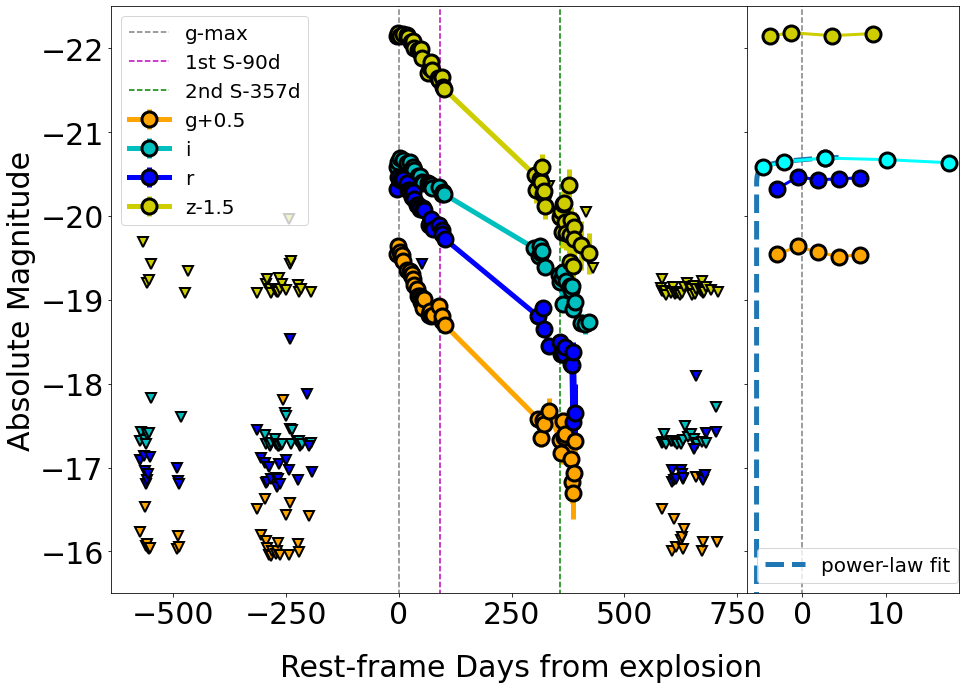

In [9]:
#grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.1)
#ax1 = plt.subplot(grid[1, :2])
#ax2 = plt.subplot(grid[1, 2])

file1='bol1.csv'
data1 = ascii.read(file1,format='csv')
t = data1['t0']
magabs = data1['mag_abs']
magerror =  data1['dmag']
yerr =  magerror
#plt.errorbar(t,magabs,yerr=magerror,fmt = 'k',marker= '+',markersize =10, label = 'Bol LC',linewidth = 5)
#plt.plot(t,magabs,color = 'k',linewidth = 5)
#fig = plt.figure(figsize=(19.20,10.80))
#f1= plt.figure(figsize=(8.20,10.80))
#f2= plt.figure(figsize=(5,10.8))
#ax1 = f1.add_subplot(211)
#ax2 = f2.add_subplot(212)
import seaborn as sns
sns.reset_orig()
fig = fig.add_subplot(111) 
fig, axs = plt.subplots(1, 2,figsize=(15.20,10.80), sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0,'width_ratios': [3, 1], 'wspace': 0})
(ax1, ax2) = axs

ax1.errorbar(tg[:42],amg[:42]+0.5,yerr=amge[:42],marker= 'o',color ='orange',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'g+0.5',linewidth = 5)
ax1.errorbar(ti[:42],ami[:42],yerr=amie[:42], marker ='o', color = 'c',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'i',linewidth = 5)
ax1.errorbar(tr[:42],amr[:42],yerr=amre[:42],marker ='o', color = 'b',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'r',linewidth = 5)
ax1.errorbar(tz[:46],amz[:46]-1.5,yerr=amze[:46],marker ='o', color = '#CDCD00',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'z-1.5',linewidth = 5)

#upper limit
ax1.plot(tug,amug+0.5,marker= 'v',color ='orange',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)
ax1.plot(tui,amui,marker= 'v',color ='c',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)
ax1.plot(tur,amur,marker= 'v',color ='b',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)
ax1.plot(tuz,amuz-1.5,marker= 'v',color ='#CDCD00',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)

ax1.plot([0,0],[-15,-22.5],color = 'gray',linestyle = '--',label = 'g-max')
ax1.plot([90.4400000000023,90.4400000000023],[-15,-22.5],color = 'm',linestyle = '--',label = '1st S-90d')
ax1.plot([357.440000000002,357.440000000002],[-15,-22.5],color = 'g',linestyle = '--',label = '2nd S-357d')

#plt.yscale('log')
#plt.xscale('log')
ax1.set_ylim(-15.5,-22.5)
#ax1.set_xlabel('Rest-frame Days from explosion',fontsize =30)
ax1.set_ylabel(r'Absolute Magnitude',fontsize=30)
ax1.tick_params(labelsize=30)
ax1.legend(fontsize =20)

#ax2.plot([2,3,4],[4,7,9])
df= pd.read_csv("grizps11aop.csv") #read in the data
df = df.dropna() #drop the nan entries
index_fit=3 
data_t = df['phasei'].tolist()[:index_fit]
data_lum = df['mag_absi']
data_f = data_lum.tolist()[:index_fit]

#define a power law function F = F0(t-t0)^alpha
def power_law(t,F0,t0,alpha):
    return F0*(t-t0)**alpha
#fit data to the powerlaw (I got the initial guesses for the paramaters from trial and error)
pars, cov = curve_fit(f=power_law, xdata=data_t, ydata=data_f, p0 =[1.7E8, -10, 0.1])
pars, cov = curve_fit(f=power_law, xdata=data_t, ydata=data_f, p0 =[1.7E8, -10, 0.1])

#extrapolate to earlier times
model_t = np.linspace(pars[1],5, num = 1000,dtype=np.complex)
model_f = power_law(model_t, *pars)
ax2.plot([0,0],[-15,-22.5],color = 'gray',linestyle = '--')
ax2.errorbar(data_t,data_f,marker= 'o',color ='cyan',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
ax2.plot(model_t,model_f,linewidth = 5, linestyle = '--', label='power-law fit')
ax2.errorbar(df['phasei'][2:5],data_lum[2:5],marker= 'o',color ='cyan',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
ax2.errorbar(df['phaser'][:5],df['mag_absr'][:5],marker= 'o',color ='blue',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
ax2.errorbar(df['phaseg'][:5],df['mag_absg'][:5]+0.5,marker= 'o',color ='orange',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
ax2.errorbar(df['phasez'][:4],df['mag_absz'][:4]-1.5,marker= 'o',color ='#CDCD00',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
#ax2.set_ylabel(r'Absolute Magnitude',fontsize=30)
#ax2.gca().invert_yaxis()
ax2.tick_params(labelsize=30) 
ax2.legend(fontsize =20)
ax2.set_ylim(-15.5,-22.5)
fig.text(0.5, 0.03,'Rest-frame Days from explosion',fontsize =30, va='center',ha ='center')


<ipython-input-125-899fb79ae101>:51: RuntimeWarning: invalid value encountered in power
  return F0*(t-t0)**alpha
/Users/adaezeibik/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-125-899fb79ae101>:57: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  model_t = np.linspace(pars[1],5, num = 1000,dtype=np.complex)
<ipython-input-125-899fb79ae101>:59: RuntimeWarning: divide by zero encountered in log10
  model_f_mags = -2.5*np.log10(model_f)
<ipython-input-125-899fb79ae101>:59: RuntimeWa

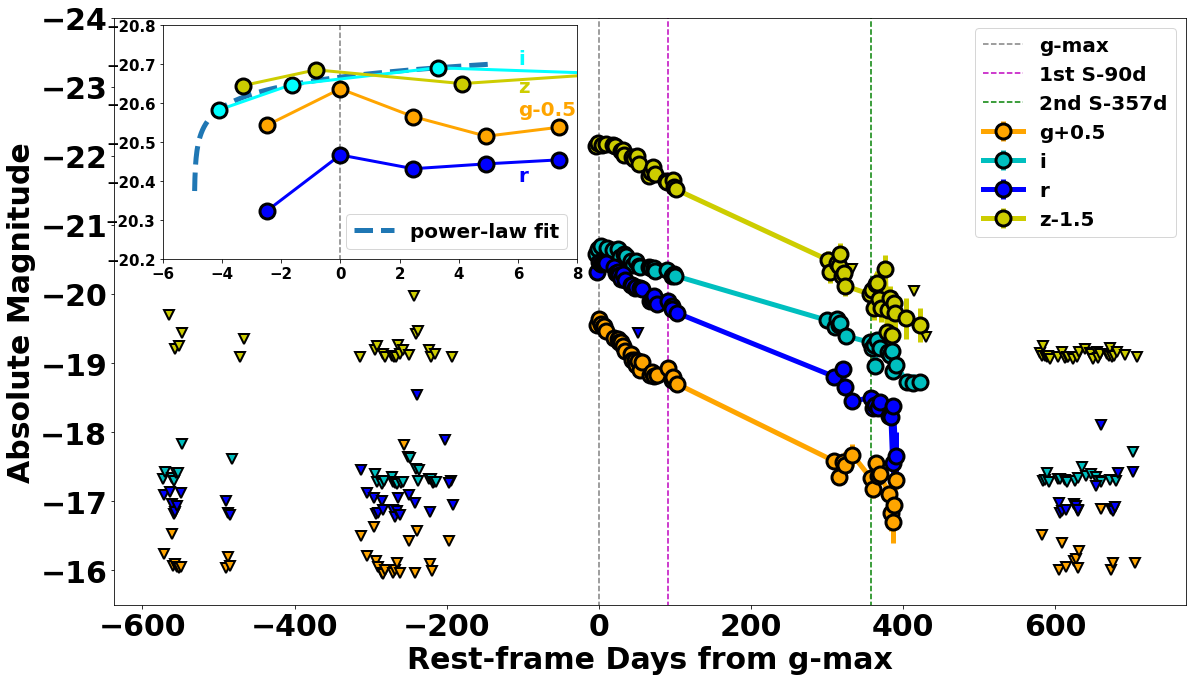

In [125]:
from scipy.optimize import curve_fit
from matplotlib import rc,rcParams
#rc('font', weight='bold')

fig,ax = plt.subplots(figsize=(19.20,10.80))
file1='bol1.csv'
data1 = ascii.read(file1,format='csv')
t = data1['t0']
magabs = data1['mag_abs']
magerror =  data1['dmag']
yerr =  magerror
#plt.errorbar(t,magabs,yerr=magerror,fmt = 'k',marker= '+',markersize =10, label = 'Bol LC',linewidth = 5)
#plt.plot(t,magabs,color = 'k',linewidth = 5)

plt.errorbar(tg[:42],amg[:42]+0.5,yerr=amge[:42],marker= 'o',color ='orange',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'g+0.5',linewidth = 5)
plt.errorbar(ti[:42],ami[:42],yerr=amie[:42], marker ='o', color = 'c',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'i',linewidth = 5)
plt.errorbar(tr[:42],amr[:42],yerr=amre[:42],marker ='o', color = 'b',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'r',linewidth = 5)
plt.errorbar(tz[:46],amz[:46]-1.5,yerr=amze[:46],marker ='o', color = '#CDCD00',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'z-1.5',linewidth = 5)

#upper limit
plt.plot(tug,amug+0.5,marker= 'v',color ='orange',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)
plt.plot(tui,amui,marker= 'v',color ='c',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)
plt.plot(tur,amur,marker= 'v',color ='b',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)
plt.plot(tuz,amuz-1.5,marker= 'v',color ='#CDCD00',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)


plt.plot([0,0],[-15,-24],color = 'gray',linestyle = '--',label = 'g-max')
plt.plot([90.4400000000023,90.4400000000023],[-15,-24],color = 'm',linestyle = '--',label = '1st S-90d')
plt.plot([357.440000000002,357.440000000002],[-15,-24],color = 'g',linestyle = '--',label = '2nd S-357d')

#plt.yscale('log')
#plt.xscale('log')
plt.ylim(-15.5,-24)
plt.xlabel('Rest-frame Days from g-max',fontsize =30,fontweight='bold')
plt.ylabel(r'Absolute Magnitude',fontsize=30,fontweight='bold')
plt.tick_params(labelsize=30)
plt.legend(fontsize =20)

ai = plt.axes([0.16, .57, .3, .3], facecolor='w')

df= pd.read_csv("grizps11aop.csv") #read in the data
df = df.dropna() #drop the nan entries
index_fit=3
data_t = (df['phasei']+0.525965).tolist()[:index_fit]
#data_lum = df['mag_absi']
data_lum = 10**(-0.4*df['mag_absi'])
data_f = data_lum.tolist()[:index_fit]

#define a power law function F = F0(t-t0)^alpha
def power_law(t,F0,t0,alpha):
    return F0*(t-t0)**alpha
#fit data to the powerlaw (I got the initial guesses for the paramaters from trial and error)
pars, cov = curve_fit(f=power_law, xdata=data_t, ydata=data_f, p0 =[1.7E8, -20, 0.1])
pars, cov = curve_fit(f=power_law, xdata=data_t, ydata=data_f, p0 =[1.7E8, -20, 0.1])

#extrapolate to earlier times
model_t = np.linspace(pars[1],5, num = 1000,dtype=np.complex)
model_f = power_law(model_t, *pars)
model_f_mags = -2.5*np.log10(model_f)
ai.plot([0,0],[-15,-22.5],color = 'gray',linestyle = '--')

ai.plot(model_t,model_f_mags,linewidth = 5, linestyle = '--', label='power-law fit')
ai.errorbar(df['phasei'][:5]+0.525965,df['mag_absi'][:5],marker= 'o',color ='cyan',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
ai.errorbar(df['phaser'][:5]+0.525965,df['mag_absr'][:5],marker= 'o',color ='blue',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
ai.errorbar(df['phaseg'][:5]+0.525965,df['mag_absg'][:5]-0.5,marker= 'o',color ='orange',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
ai.errorbar(df['phasez'][:4]+0.525965,df['mag_absz'][:4],marker= 'o',color ='#CDCD00',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
#ax2.set_ylabel(r'Absolute Magnitude',fontsize=30)
#ax2.gca().invert_yaxis()
ai.text(6,-20.7, r'i', fontsize=20,color ='cyan' )
ai.text(6,-20.63, r'z', fontsize=20,color ='#CDCD00')
ai.text(6,-20.57, r'g-0.5', fontsize=20,color ='orange')
ai.text(6,-20.4, r'r', fontsize=20,color ='blue')

ai.tick_params(labelsize=15) 
ai.legend(fontsize =20)
ai.set_ylim(-20.2,-20.8)
ai.set_xlim(-6,8)

#ai = plt.axes([0.39, .24, .46, .5], facecolor='w')
#ai.plot(x, y)

plt.legend(fontsize =20)
plt.savefig('LCzoom.png', dpi = 300, transparent = True)
#plt.show()

(-16.5, -18.0)

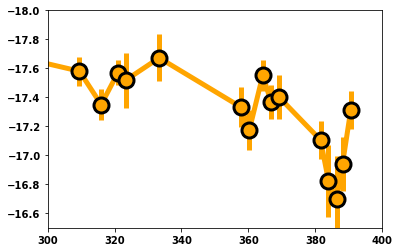

In [675]:
plt.errorbar(tg[22:42],amg[22:42]+0.5,yerr=amge[22:42],marker= 'o',color ='orange',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'g+0.5',linewidth = 5)
#plt.errorbar(ti[2:42],ami[2:42],yerr=amie[2:42], marker ='o', color = 'c',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'i',linewidth = 5)
#plt.errorbar(tr[1:42],amr[1:42],yerr=amre[1:42],marker ='o', color = 'b',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'r',linewidth = 5)
#plt.errorbar(tz[1:22],amz[1:22]-1.5,yerr=amze[1:22],marker ='o', color = '#CDCD00',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'z-1.5',linewidth = 5)
plt.xlim(300,400)
plt.ylim(-16.5,-18)


In [677]:
tg[27:37], amg[27:37]

(<MaskedColumn name='phaseg' dtype='float64' length=10>
         309.523965
         316.008965
         321.017965
         323.313965
         333.332965
         357.796965
 360.25996499999997
         364.284965
 366.74796499999997
         369.210965,
 <MaskedColumn name='mag_absg' dtype='float64' length=10>
 -18.080116
 -17.849756
 -18.070553
 -18.017782
 -18.172369
  -17.83202
 -17.674868
 -18.053303
 -17.867111
 -17.899883)

In [688]:
#last season detection decline rates
#max(tz[22:46]),  max(amz[22:46])
#min(tg[27:37]),  min(amg[27:37])
#min(tr[28:39]),  min(amr[28:39])
#min(ti[22:40]),  min(ami[22:40])

coeff2=np.polyfit(tg[27:37],amg[27:37],1) #i-band 7.44625760e-03 mag/day, r-band 7.79071653e-03 mag/day
np.poly1d(coeff2)  #g-band 3.05285348e-03 mag/day, z-band 8.17468973e-03 mag/day

poly1d([ 3.05285348e-03, -1.89963095e+01])

In [666]:
#decline rates for each band in the first 100 days post explosion
#tg[1:19], amg[1:19]
#ti[2:14], ami[2:14]
#tz[1:22],amz[1:22]
#tr[1:19],amr[1:19]

coeff1=np.polyfit(tr[1:19],amr[1:19],1) #g-band 1.18060307e-02, i-band 6.18852415e-03
np.poly1d(coeff1) # z-band  6.71362648e-03, r-band 7.79013912e-03

In [501]:
#Early upper limits median for each band
np.median(amuz[np.where(tuz<= -193.27003499999998)]) #-16.946627
#np.median(amug[np.where(tug<= -197.291035)])
#np.median(amur[np.where(tur<= -192.36503499999998)])
#np.median(amui[np.where(tui<= -194.00703499999997)])

-17.683244

In [329]:
#Early upper limits median for each band
np.median(amuz[:25]), #tuz[:25] #-17.683244
#np.median(amug[:30]), #tug[:30]  #-16.572166
#np.median(amur[:29]), #tur[:29]  #-16.957373
#np.median(amui[:29]), #tui[:29] #-17.31414

(-17.683244,)

In [124]:
pars

array([ 1.72481953e+08, -4.92817865e+00,  4.34606619e-02])

Text(0.5, 0, 'Rest-frame Days from g-max')

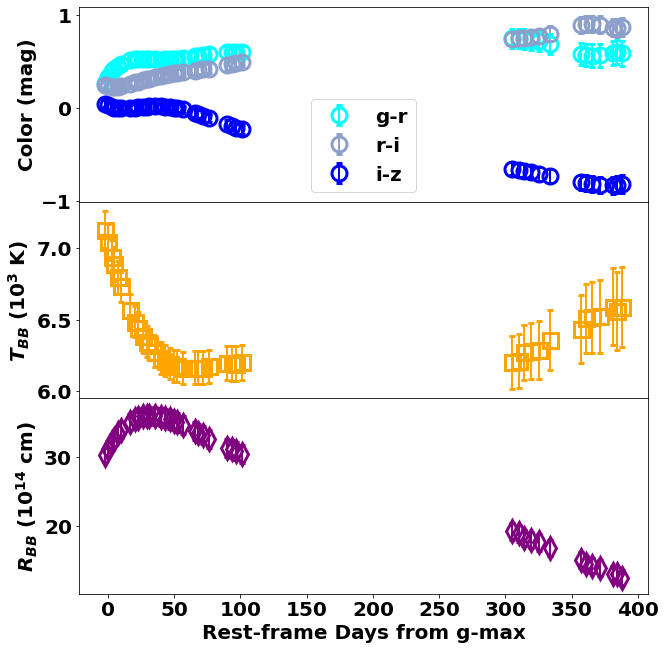

In [303]:
df= pd.read_csv("tempradps11aop.csv") #read in the data
time = df['phase']+0.525965 # + 0.525965 corrects the phase to g-max = 0 time
temp = df['temp']
temperr = df['temperr']
radius = df['radius']
radiuserr = df['radiuserr']
griz= pd.read_csv("griz-colorps11aop.csv")
time_griz = griz['phase']+0.525965
g_f = griz['g']
r_f = griz['r']
i_f = griz['i']
z_f = griz['z']

g_fe = griz['gerr']
r_fe = griz['rerr']
i_fe = griz['ierr']
z_fe = griz['zerr']
#E(B-V) = 0.0347
#Ag = 3.172*E(B-V)
#Ar = 2.271*E(B-V)
#Ai = 1.682*E(B-V)
#Az = 1.263*E(B-V)

g_ab = ((-2.5*np.log10(g_f)) + 27.5)-(3.172*0.0347)
g_error = (2.5*g_fe)/(np.log(10)*g_f)

r_ab = ((-2.5*np.log10(r_f)) + 27.5)-(2.271*0.0347)
r_error = (2.5*r_fe)/(np.log(10)*r_f)

i_ab = ((-2.5*np.log10(i_f)) + 27.5)-(1.682*0.0347)
i_error = (2.5*i_fe)/(np.log(10)*i_f)

z_ab = ((-2.5*np.log10(z_f)) + 27.5)-(1.263*0.0347)
z_error = (2.5*z_fe)/(np.log(10)*z_f)

gr = g_ab - r_ab
ri = r_ab - i_ab
iz = i_ab - z_ab
gr_err = np.sqrt(g_error**2 + r_error**2)
ri_err = np.sqrt(r_error**2 + i_error**2)
iz_err = np.sqrt(i_error**2 + z_error**2)

from matplotlib import rc,rcParams
rc('font', weight='bold')

#fig,ax = plt.subplots(figsize=(19.20,10.80))
fig, axs = plt.subplots(3,figsize=(10.20,10.80), sharex=True, sharey=False, gridspec_kw={'hspace': 0})
#fig.suptitle('Sharing both axes')
axs[0].errorbar(time_griz,gr,yerr= gr_err, fmt = 'o',color = 'cyan',markerfacecolor='none', capthick=1,elinewidth=2,capsize=3,markeredgewidth=3,markersize =15,linewidth = 3,label = 'g-r' )
#axs[0].plot(time_griz,gr,color = 'green',linewidth = 3)
axs[0].errorbar(time_griz,ri,yerr= ri_err, fmt = 'o',color = '#8da0cb',markerfacecolor='none',capthick=1,elinewidth=2,capsize=3, markeredgewidth=3,markersize =15,linewidth = 3,label = 'r-i' )
#axs[0].plot(time_griz,ri,color = 'red',linewidth = 3)
axs[0].errorbar(time_griz,iz,yerr= iz_err, fmt = 'o',color = 'blue',markerfacecolor='none',capthick=1,elinewidth=2,capsize=3, markeredgewidth=3,markersize =15,linewidth = 3,label = 'i-z' )
#axs[0].plot(time_griz,iz,color = 'blue',linewidth = 3)
axs[0].set_ylabel('Color (mag)', fontsize = 20,fontweight='bold')
axs[0].tick_params(labelsize=20)
axs[0].legend(fontsize =20)

axs[1].errorbar(time, temp/1000,yerr=temperr/1000,fmt= 's',color = 'orange',markerfacecolor='none',capthick=1,elinewidth=2,capsize=3, markeredgewidth=3,markersize =15,linewidth = 3)
#axs[1].plot(time,temp/1000,color = 'orange',linewidth = 3)
axs[1].set_ylabel(r'$T_{BB}$ ($10^{3}$ K)', fontsize = 20,fontweight='bold')
axs[1].tick_params(labelsize=20)

axs[2].errorbar(time, radius,yerr = radiuserr,fmt= 'd',color = 'purple',markerfacecolor='none',capthick=1,elinewidth=2,capsize=3, markeredgewidth=3,markersize =15,linewidth = 3)
#axs[2].plot(time,radius,color = 'purple',linewidth = 3)
axs[2].set_ylabel(r'$R_{BB}$ ($10^{14}$ cm)', fontsize = 20,fontweight='bold')
axs[2].tick_params(labelsize=20)
plt.xlabel('Rest-frame Days from g-max',fontsize =20, fontweight='bold')
#plt.ylabel(r'Absolute Magnitude',fontsize=30)
#plt.tick_params(labelsize=30)
#plt.legend(fontsize =20)
#plt.savefig('tempradcolor.png', dpi = 300, transparent = True)
#plt.show()


In [358]:
#Expansion velocity from photometry
rad=max(df[0:3]['radius'])-min(df[0:3]['radius'])
tim=((max(df[0:3]['phase'])-min(df[0:3]['phase'])))*86400.
#rad*1e14,tim
(rad*1e14/100000)/tim #km/s

4107.336761302936

In [357]:
tim/86400.   #4days, by additional 12 days, it reduced to 3000km/s
#18-5

9.78984